### Model 2

In [30]:
# imports
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics as metrics

In [5]:
df = pd.read_csv('subreddit_data_post_eda.csv')

In [6]:
df.head()

,Unnamed: 0,title,selftext,subreddit,created_utc
0,0,"I was suggested to post this puzzle here ,hope...",NaN,chess,1645890879
1,1,Programs for analyzing and annotating my games,"Hi all, \n\n&amp;#x200B;\n\nI am starting to t...",chess,1645889769
2,2,Who is GM Watneg on lichess?,NaN,chess,1645887353
3,3,Glitch in Lichess Analysis,&amp;#x200B;\n\n[I was playing a game continua...,chess,1645886429
4,4,Does anyone know what the heck a zero day that...,Someone sent me something weird about correlat...,chess,1645885215


In [9]:
# Baseline Model.  We need to beat 50%.
df['subreddit'].value_counts(normalize = True)

1    0.500375
0    0.499625
Name: subreddit, dtype: float64

In [10]:
# Create X and Y for CountVectorizer

X = df['title']
y = df['subreddit']

In [11]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [14]:
# Create Pipeline

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('model', LogisticRegression())
])

In [28]:
param_grid = {
    'vect__binary': [True, False],
    'vect__max_features': [None, 4000, 5000],
    'vect__min_df' : [2,3,4],
    'vect__max_df' : [.95],
    'vect__ngram_range' : [(1,1),(1,2)]
}
gs = GridSearchCV(pipe, param_grid=param_grid)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.9372682248191431


{'vect__binary': False,
 'vect__max_df': 0.95,
 'vect__max_features': None,
 'vect__min_df': 2,
 'vect__ngram_range': (1, 1)}

### Model Evaluation

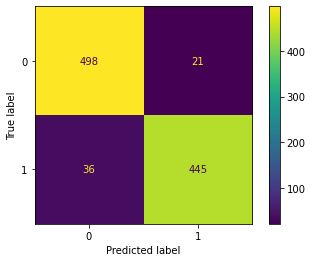

In [29]:
plot_confusion_matrix(gs, X_test, y_test)

In [31]:
# Make predictions
predictions = gs.predict(X_test)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       519
           1       0.95      0.93      0.94       481

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



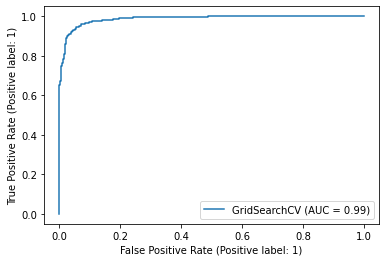

In [35]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(gs, X_test, y_test);